<a href="https://colab.research.google.com/github/jaredGtzC/Assignments/blob/main/act4/Copia_de_AF2_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Processing Datasets in Python
Dora Jazmín González Díaz          #2049427



PART 1



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


# Load data from a CSV file
df = pd.read_csv('sample_data/diabetes.csv')
print(df)

# Show the first 20 rows of data.
print(df.head(20))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
# Check if there are null values (missing values) in any column and how to handle them.
# You can use isnull() and sum() to identify null values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

PART 2

In [ ]:
# If there are null values we can choose to fill them with the mean
x = "Pregnancies"
df[x] = df[x].fillna(df[x].mean())
print(df[x])

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64


In [ ]:
# Min-Max normalization scale values between 0 and 1
df_normalization = (df - df.min()) / (df.max() - df.min())
print(df_normalization)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

PART 3

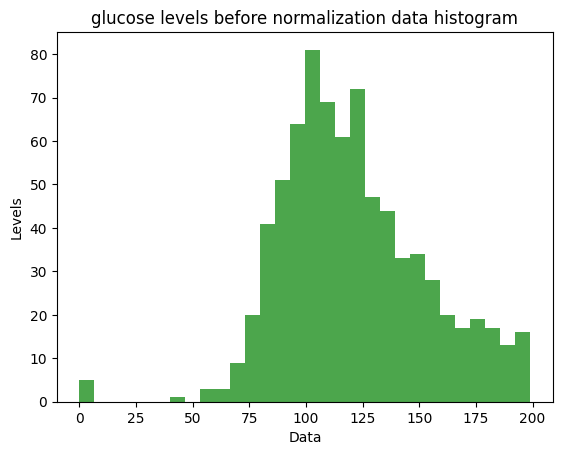

In [ ]:
datos = df['Glucose']  # Select only the 'Glucose' column
plt.hist(datos, bins=30, color='green', alpha=0.7)  # Draws the histogram
plt.title("glucose levels before normalization data histogram")  # Title
plt.xlabel("Data")  # Label for the x-axis
plt.ylabel("Levels")  # Label for the y-axis
plt.show()  # Shows the graph

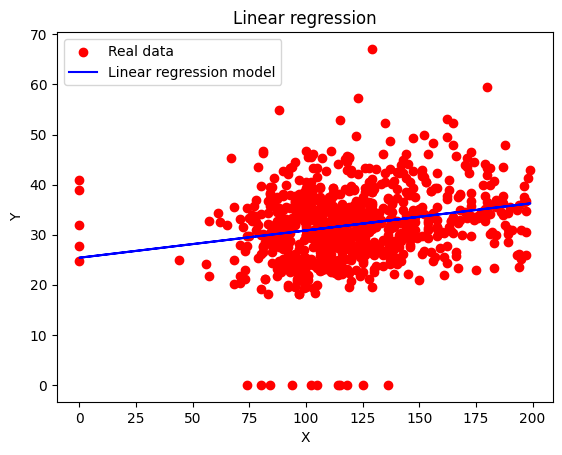

In [ ]:
X = df[["Glucose"]].values
Y = df[["BMI"]].values

model = LinearRegression()
model.fit(X,Y)

y_pred = model.predict(X)

plt.scatter(X,Y, color = "red", label="Real data" )
plt.plot(X, y_pred, color = "blue", label = "Linear regression model")
plt.title("Linear regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

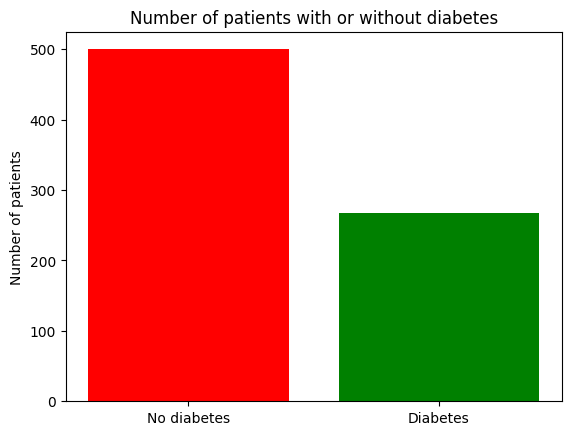

In [ ]:
Results = df["Outcome"].value_counts()

plt.bar(Results.index, Results.values, color = ["red","green"])
plt.xticks([0,1],["No diabetes", "Diabetes"])
plt.ylabel("Number of patients")
plt.title("Number of patients with or without diabetes")
plt.show()